# 📦 Step 1: Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 📁 Step 2: Load dataset

In [16]:
from google.colab import files
uploaded = files.upload()


Saving house_price_dataset.csv to house_price_dataset.csv


In [17]:
data = pd.read_csv('house_price_dataset.csv')  # Make sure the file is uploaded
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
   SquareFeet  Bedrooms  Bathrooms   Price
0        1360         1          1  214719
1        4272         1          3  680929
2        3592         3          3  587283
3         966         3          1  172439
4        4926         3          3  784864


# 📊 Step 3: Dataset information and visualization


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   SquareFeet  200 non-null    int64
 1   Bedrooms    200 non-null    int64
 2   Bathrooms   200 non-null    int64
 3   Price       200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB
None


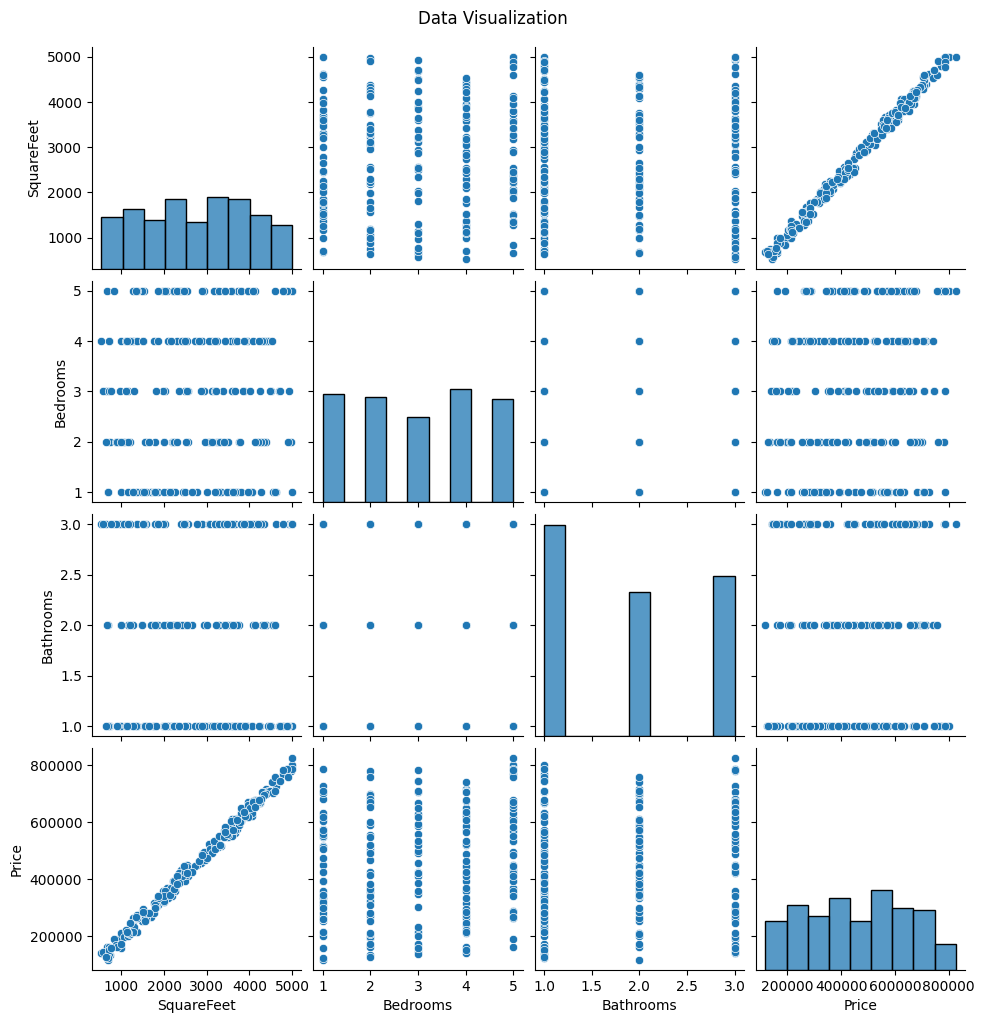

In [18]:
print("\nDataset Info:")
print(data.info())

sns.pairplot(data)
plt.suptitle("Data Visualization", y=1.02)
plt.show()

# 🎯 Step 4: Feature selection

In [20]:
X = data[['SquareFeet', 'Bedrooms', 'Bathrooms']]
y = data['Price']

# ✂️ Step 5: Split dataset

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🧠 Step 6: Train Linear Regression model

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# 📈 Step 7: Predictions

In [26]:
y_pred = model.predict(X_test)

# 🧮 Step 8: Evaluation

In [27]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n📊 Model Evaluation:")
print("Mean Squared Error:", mse)
print("R² Score:", r2)

print("\n📌 Model Coefficients:")
print(f"SquareFeet Coefficient: {model.coef_[0]}")
print(f"Bedrooms Coefficient: {model.coef_[1]}")
print(f"Bathrooms Coefficient: {model.coef_[2]}")
print(f"Intercept: {model.intercept_}")


📊 Model Evaluation:
Mean Squared Error: 36505692.63982259
R² Score: 0.9988505218598449

📌 Model Coefficients:
SquareFeet Coefficient: 149.90344048571527
Bedrooms Coefficient: 9738.448884990372
Bathrooms Coefficient: 6669.347482363121
Intercept: 1886.3795133139938


# 🌟 Step 9: Predict house price from user-defined input

In [28]:
try:
    sqft = float(input("Enter square footage: "))
    bedrooms = int(input("Enter number of bedrooms: "))
    bathrooms = int(input("Enter number of bathrooms: "))

    # Create input DataFrame
    user_input = pd.DataFrame([{
        'SquareFeet': sqft,
        'Bedrooms': bedrooms,
        'Bathrooms': bathrooms
    }])

    # Predict price
    predicted_price = model.predict(user_input)
    print(f"\nPredicted house price: ${predicted_price[0]:,.2f}")

except ValueError:
    print("Invalid input! Please enter numeric values.")

Enter square footage: 2000
Enter number of bedrooms: 3
Enter number of bathrooms: 2

Predicted house price: $344,247.30


# 📊 Step 10: Plot actual vs predicted prices

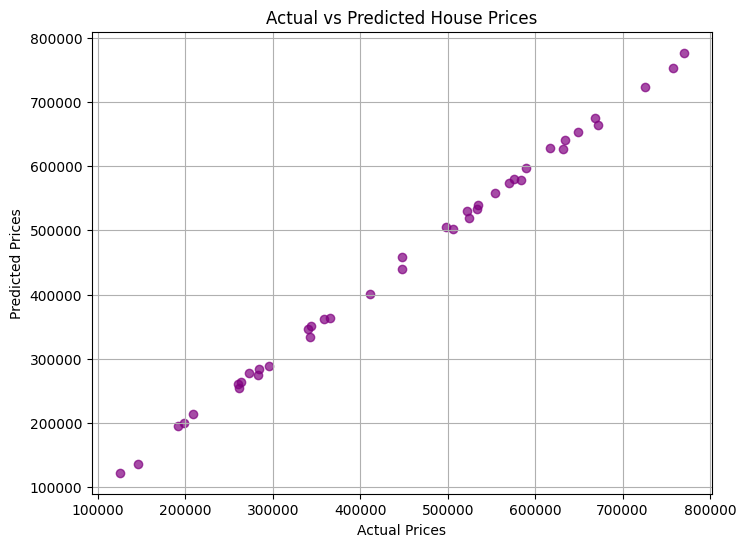

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='purple')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()